In [1]:
import pandas as pd
import scipy as stats
from datetime import datetime

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
individual_data= "Dow Data/DOW Data.csv"
individual_industry= 'Dow Data/DOW Names.csv'
dow= "Dow Data/^DJI.csv"

In [3]:
individual_df = pd.read_csv(individual_data)
industry_df= pd.read_csv(individual_industry)
dow_df=pd.read_csv(dow)

In [4]:
individual_df

,Date,Open,High,Low,Close,Volume,Name
0,1/2/15,111.389999,111.440002,107.349998,109.330002,53204600,AAPL
1,1/5/15,108.290001,108.650002,105.410004,106.250000,64285500,AAPL
2,1/6/15,106.540001,107.430000,104.629997,106.260002,65797100,AAPL
3,1/7/15,107.199997,108.199997,106.699997,107.750000,40105900,AAPL
4,1/8/15,109.230003,112.150002,108.699997,111.889999,59364500,AAPL
...,...,...,...,...,...,...,...
36448,12/23/19,58.709999,59.000000,58.419998,58.570000,4813200,WBA
36449,12/24/19,58.900002,58.919998,58.279999,58.349998,1475400,WBA
36450,12/26/19,58.340000,59.020000,58.299999,58.900002,2736100,WBA
36451,12/27/19,58.919998,59.029999,58.380001,59.020000,3647600,WBA


In [5]:
industry_df

,Stock Name,Ticker,Industry,Sector
0,3M Company,MMM,Specialty Industrial Machinery,Industrials
1,American Express Company,AXP,Credit Services,Financial Services
2,Apple Inc.,AAPL,Consumer Electronics,Technology
3,The Boeing Company,BA,Aerospace & Defense,Industrials
4,Caterpillar Inc.,CAT,Farm & Heavy Construction Machinery,Industrials
5,Chevron Corporation,CVX,Oil & Gas Integrated,Energy
6,"Cisco Systems, Inc.",CSCO,Communication Equipment,Technology
7,The Coca-Cola Company,KO,Beverages?Non-Alcoholic,Consumer Defensive
8,The Walt Disney Company,DIS,Entertainment,Communication Services
9,Dow Inc.,DOW,Chemicals,Basic Materials


In [6]:
industry_df.rename(columns = {'Ticker':'Symbol'}, inplace=True)
individual_df.rename(columns={'Name': "Symbol"}, inplace= True)
stocks_df=individual_df.merge(industry_df, on="Symbol")
stocks_df.head(10)

,Date,Open,High,Low,Close,Volume,Symbol,Stock Name,Industry,Sector
0,1/2/15,111.389999,111.440002,107.349998,109.330002,53204600,AAPL,Apple Inc.,Consumer Electronics,Technology
1,1/5/15,108.290001,108.650002,105.410004,106.250000,64285500,AAPL,Apple Inc.,Consumer Electronics,Technology
2,1/6/15,106.540001,107.430000,104.629997,106.260002,65797100,AAPL,Apple Inc.,Consumer Electronics,Technology
3,1/7/15,107.199997,108.199997,106.699997,107.750000,40105900,AAPL,Apple Inc.,Consumer Electronics,Technology
4,1/8/15,109.230003,112.150002,108.699997,111.889999,59364500,AAPL,Apple Inc.,Consumer Electronics,Technology
5,1/9/15,112.669998,113.250000,110.209999,112.010002,53699500,AAPL,Apple Inc.,Consumer Electronics,Technology
6,1/12/15,112.599998,112.629997,108.800003,109.250000,49650800,AAPL,Apple Inc.,Consumer Electronics,Technology
7,1/13/15,111.430000,112.800003,108.910004,110.220001,67091900,AAPL,Apple Inc.,Consumer Electronics,Technology
8,1/14/15,109.040001,110.489998,108.500000,109.800003,48956600,AAPL,Apple Inc.,Consumer Electronics,Technology
9,1/15/15,110.000000,110.059998,106.660004,106.820000,60014000,AAPL,Apple Inc.,Consumer Electronics,Technology


In [7]:
stocks_df['Daily Change'] = stocks_df['Close'] - stocks_df['Open']
max_value=stocks_df["Daily Change"].max()
max_day_profit=stocks_df.loc[(stocks_df['Daily Change']== max_value)]
max_day_profit

,Date,Open,High,Low,Close,Volume,Symbol,Stock Name,Industry,Sector,Daily Change
4823,3/11/19,371.269989,402.670013,365.549988,400.01001,34742200,BA,The Boeing Company,Aerospace & Defense,Industrials,28.740021


In [8]:
group_by_individual = stocks_df.groupby('Symbol')
daily_max_per_stock=group_by_individual['Daily Change'].max()
stock_daily_max=pd.DataFrame({"Daily Max Per Stock": daily_max_per_stock})
stock_daily_max.sort_values('Daily Max Per Stock', ascending=False)

,Daily Max Per Stock
Symbol,
BA,28.740021
GS,14.490005
UNH,13.290009
HD,12.419998
DIS,10.139999
AAPL,8.869995
CAT,8.339997
MMM,7.739991
V,7.209999


In [9]:
min_value= stocks_df["Daily Change"].min()
max_loss_profit=stocks_df.loc[(stocks_df['Daily Change']== min_value)]
max_loss_profit

,Date,Open,High,Low,Close,Volume,Symbol,Stock Name,Industry,Sector,Daily Change
4978,10/18/19,369.0,369.350006,344.0,344.0,13544300,BA,The Boeing Company,Aerospace & Defense,Industrials,-25.0


In [39]:
stocks_df['Date']= pd.to_datetime(stocks_df['Date'])
stocks_df['Week Number']= stocks_df['Date'].dt.week
stocks_df['Year']= stocks_df['Date'].dt.year
stocks_df['Quarter']= stocks_df['Date'].dt.quarter
stocks_df
weekly_change= stocks_df.groupby(['Symbol','Year','Week Number']).agg({'Open':'first','Close':'last'})
weekly_change=weekly_change.reset_index()
weekly_change['Weekly Change'] = weekly_change['Close'] - weekly_change['Open']
weekly_change_max=weekly_change['Weekly Change'].max()
highest_weekly_change= weekly_change.loc[(weekly_change['Weekly Change']== weekly_change_max)]
highest_weekly_change

,Symbol,Year,Week Number,Open,Close,Weekly Change
209,AAPL,2019,1,154.889999,291.519989,136.62999


In [11]:
week_high_2015= weekly_change.loc[(weekly_change['Week Number']== 10) & (weekly_change['Year']== 2015)]
week_high_2015_max= week_high_2015['Weekly Change'].max()
week_high_2015_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2015_max]
week_high_2015_max_stock

,Symbol,Year,Week Number,Open,Close,Weekly Change
531,BA,2015,10,150.850006,153.119995,2.269989


In [12]:
week_high_2016= weekly_change.loc[(weekly_change['Week Number']== 34) & (weekly_change['Year']== 2016)]
week_high_2016_max= week_high_2016['Weekly Change'].max()
week_high_2016_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2016_max]
week_high_2016_max_stock

,Symbol,Year,Week Number,Open,Close,Weekly Change
1130,CSCO,2016,34,30.440001,31.35,0.909999


In [13]:
week_high_2017= weekly_change.loc[(weekly_change['Week Number']== 23) & (weekly_change['Year']== 2017)]
week_high_2017_max= week_high_2017['Weekly Change'].max()
week_high_2017_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2017_max]
week_high_2017_max_stock

,Symbol,Year,Week Number,Open,Close,Weekly Change
1954,GS,2017,23,213.080002,222.440002,9.36


In [14]:
week_high_2018= weekly_change.loc[(weekly_change['Week Number']== 38) & (weekly_change['Year']== 2018)]
week_high_2018_max= week_high_2018['Weekly Change'].max()
week_high_2018_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2018_max]
week_high_2018_max_stock

,Symbol,Year,Week Number,Open,Close,Weekly Change
716,BA,2018,38,359.279999,372.230011,12.950012


In [15]:
week_high_2019= weekly_change.loc[(weekly_change['Week Number']== 46) & (weekly_change['Year']== 2019)]
week_high_2019_max= week_high_2019['Weekly Change'].max()
week_high_2019_max_stock= weekly_change.loc[weekly_change['Weekly Change']== week_high_2019_max]
week_high_2019_max_stock

,Symbol,Year,Week Number,Open,Close,Weekly Change
776,BA,2019,46,349.040009,371.679993,22.639984


In [16]:
stocks_df['Date']= pd.to_datetime(stocks_df['Date'])
stocks_df['Month Number']= stocks_df['Date'].dt.month
stocks_df
monthly_change_old= stocks_df.groupby(['Symbol','Year','Month Number','Sector']).agg({'Open':'first','Close':'last'})
monthly_change=monthly_change_old.reset_index()
monthly_change["Monthly Change"]= monthly_change['Close'] - monthly_change['Open']
monthly_change_group=monthly_change.groupby(["Sector","Year","Month Number"])["Monthly Change"].mean()

In [17]:
stocks_month = pd.DataFrame(monthly_change_group)
stocks_month = stocks_month.reset_index()
year_month_df=pd.DataFrame({'year': stocks_month['Year'], 'month': stocks_month['Month Number'], 'day':[1 for x in range(480)]})
stocks_month['Year-Month']= pd.to_datetime(year_month_df)
stocks_month

,Sector,Year,Month Number,Monthly Change,Year-Month
0,Communication Services,2015,1,-2.620003,2015-01-01
1,Communication Services,2015,2,8.015000,2015-02-01
2,Communication Services,2015,3,0.025002,2015-03-01
3,Communication Services,2015,4,2.639999,2015-04-01
4,Communication Services,2015,5,-0.444997,2015-05-01
...,...,...,...,...,...
475,Technology,2019,8,-5.961996,2019-08-01
476,Technology,2019,9,7.543999,2019-09-01
477,Technology,2019,10,3.591995,2019-10-01
478,Technology,2019,11,5.070003,2019-11-01


In [40]:
monthly_change_max=monthly_change['Monthly Change'].max()
monthly_change.loc[(monthly_change['Monthly Change']== monthly_change_max)]

,Symbol,Year,Month Number,Sector,Open,Close,Monthly Change
168,BA,2019,1,Industrials,316.190002,385.619995,69.429993


In [18]:
month_list= stocks_month['Year-Month'].tolist()
calender=['January 2015','February','March','April','May','June','July','August','September','October','November','December',
         'January 2016','February','March','April','May','June','July','August','September','October','November','December',
         'January 2017','February','March','April','May','June','July','August','September','October','November','December',
         'January 2018','February','March','April','May','June','July','August','September','October','November','December',
         'January 2019','February','March','April','May','June','July','August','September','October','November','December']

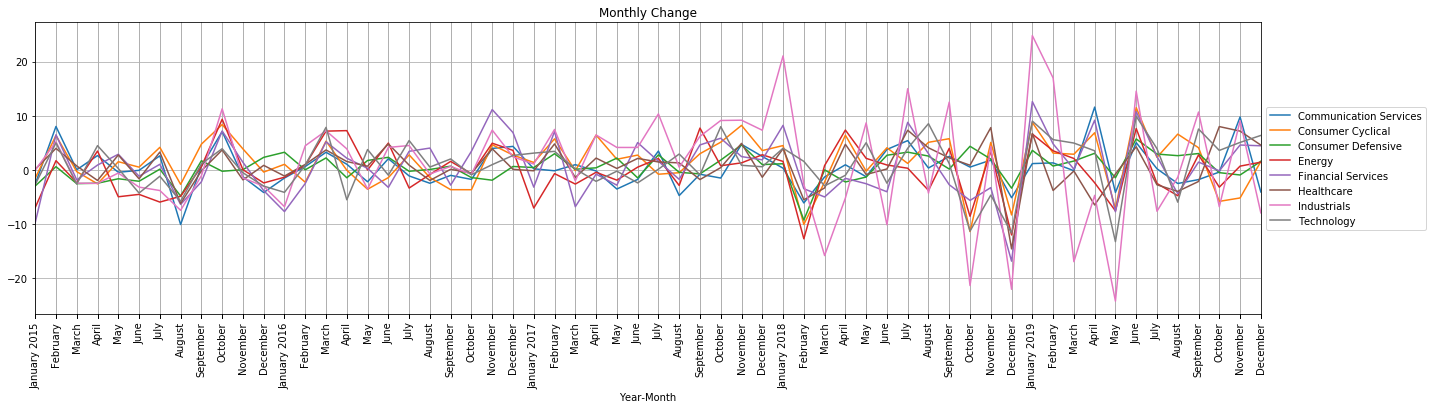

In [19]:
stocks_month.head()
stocks_month=stocks_month.groupby(['Sector','Year-Month'])['Monthly Change'].mean()

stocks_b = pd.DataFrame(stocks_month)
stocks_b =stocks_b.unstack(level=0)
stocks_b.columns = stocks_b.columns.droplevel()
stocks_b = stocks_b.reset_index()
stocks_b.set_index("Year-Month",inplace= True)
stocks_b

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,1,1)
stocks_b.plot(ax=ax1)

ax1.set_title('Monthly Change')
ax1,plt.xticks(month_list,calender,rotation=90)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid()
plt.tight_layout()

In [20]:
quarterly_change= stocks_df.groupby(['Symbol','Year','Quarter','Sector']).agg({'Open':'first','Close':'last'})
quarterly_change['Quarterly Change'] = quarterly_change['Close'] - quarterly_change['Open']
quarterly_change=quarterly_change.reset_index()
stocks_quarter=pd.DataFrame(quarterly_change)
stocks_quarter

,Symbol,Year,Quarter,Sector,Open,Close,Quarterly Change
0,AAPL,2015,1,Technology,111.389999,124.430000,13.040001
1,AAPL,2015,2,Technology,124.820000,125.430000,0.610000
2,AAPL,2015,3,Technology,126.900002,110.300003,-16.599999
3,AAPL,2015,4,Technology,109.070000,105.260002,-3.809998
4,AAPL,2016,1,Technology,102.610001,108.989998,6.379997
...,...,...,...,...,...,...,...
575,XOM,2018,4,Energy,85.349998,68.190002,-17.159996
576,XOM,2019,1,Energy,67.349998,80.800003,13.450005
577,XOM,2019,2,Energy,81.230003,76.629997,-4.600006
578,XOM,2019,3,Energy,77.129997,70.610001,-6.519996


In [21]:
stocks_quarter["Year-Quarter"]= stocks_quarter['Year'].astype(str)+ " Q: "+ stocks_quarter['Quarter'].astype(str)
quarter_list= stocks_quarter['Year-Quarter'].tolist()

In [22]:
stocks_quarter_g= stocks_quarter.groupby(['Sector','Year-Quarter'])['Quarterly Change'].mean()
stocks_quarter_graph_index= pd.DataFrame(stocks_quarter_g)
stocks_quarter_graph_index = stocks_quarter_graph_index.unstack(level=0)
stocks_quarter_graph_index = stocks_quarter_graph_index.reset_index()
stocks_quarter_graph_index.columns = stocks_quarter_graph_index.columns.droplevel()
stocks_quarter_graph_index.set_index("", inplace= True)
stocks_quarter_graph_index

Sector,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Technology
,,,,,,,,
2015 Q: 1,5.804998,4.550000,-4.876663,-6.949997,-4.514999,4.937999,2.201599,0.100001
2015 Q: 2,3.434999,-0.160000,-5.703335,-5.899998,3.646000,-0.487999,-5.125713,1.206003
2015 Q: 3,-7.940001,4.493335,-4.156667,-13.175004,-9.586003,-4.712001,-14.604921,-7.464000
2015 Q: 4,2.420000,12.193331,2.309999,6.494999,5.320002,3.406001,7.135564,0.916000
2016 Q: 1,2.299999,4.036664,5.329998,5.979999,-4.761997,3.541998,4.338925,4.737997
2016 Q: 2,0.769998,-5.426670,2.286667,11.239998,-0.888001,7.143999,3.819662,-2.973999
2016 Q: 3,-4.379999,-2.129999,0.403336,-3.970002,4.956000,-0.766002,4.031550,7.830002
2016 Q: 4,6.645000,3.626668,-2.943332,9.234997,22.578000,3.157998,9.299299,2.652002
2017 Q: 1,1.439999,7.739998,3.250001,-9.969997,-0.135998,3.499999,8.241343,8.191999


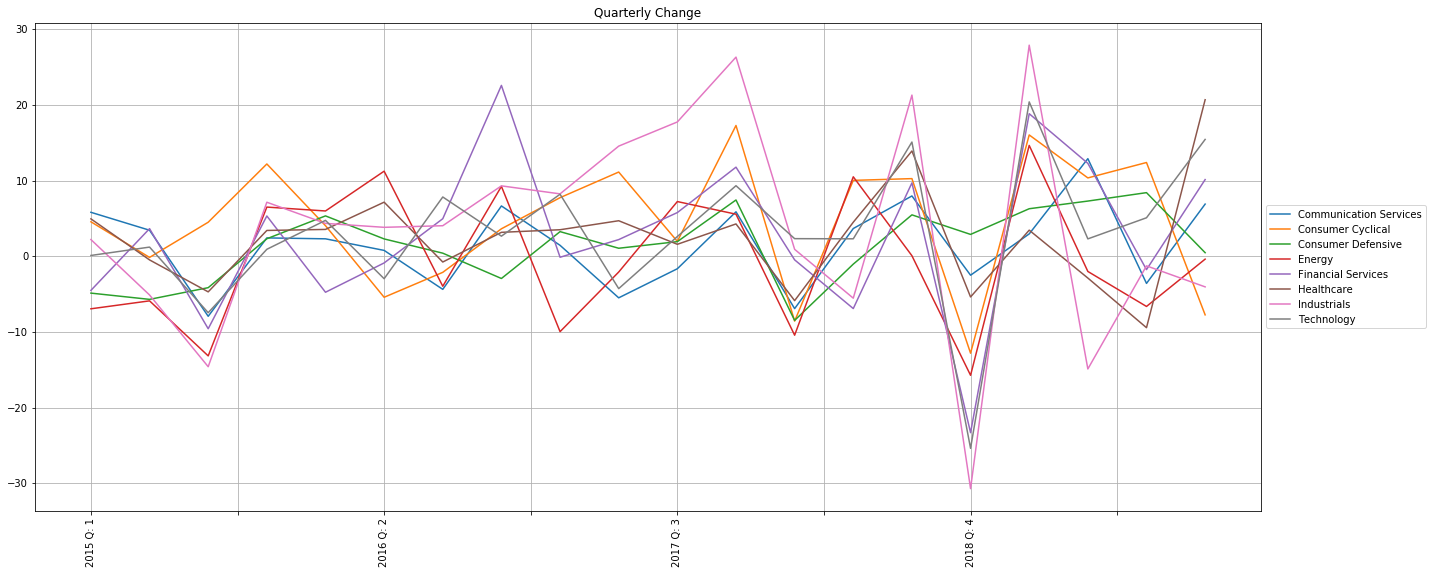

In [23]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2,1,1)

stocks_quarter_graph_index.plot(ax=ax1)

ax1.set_title('Quarterly Change')
ax1,plt.xticks(label= quarter_list,rotation=90)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax1.grid()
plt.tight_layout()

In [24]:
dow_df['Date']= pd.to_datetime(dow_df['Date'])
dow_df['Month Number']= dow_df['Date'].dt.month
dow_df['Year'] = dow_df['Date'].dt.year
dow_df
monthly_change_dow= dow_df.groupby(['Year','Month Number']).agg({'Open':'first','Close':'last'})

monthly_change_dow=monthly_change_dow.reset_index()
monthly_change_dow["Monthly Change"]= monthly_change_dow['Close']- monthly_change_dow['Open']
monthly_change_dow["Year-Month"]= pd.to_datetime(year_month_df)

In [25]:
dow_graph_old= pd.DataFrame({"Year-Month":monthly_change_dow["Year-Month"],"Monthly Change":monthly_change_dow['Monthly Change']})
dow_graph= dow_graph_old.set_index("Year-Month")
dow_graph

,Monthly Change
Year-Month,
2015-01-01,-658.121094
2015-02-01,962.708985
2015-03-01,-357.931640
2015-04-01,62.000000
2015-05-01,151.410157
2015-06-01,-398.310547
2015-07-01,51.740234
2015-08-01,-1168.710937
2015-09-01,-243.329102


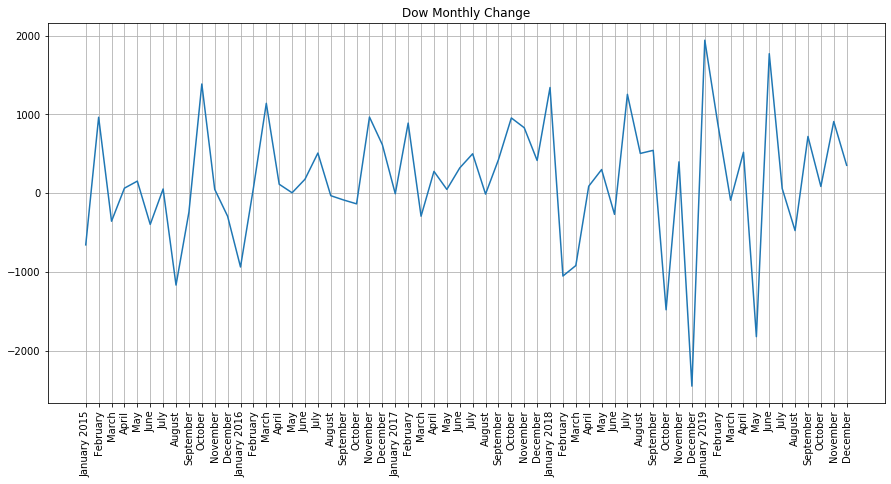

In [26]:
fig=plt.figure(figsize=(15,7))
ax= np.arange(len(dow_graph))
plt.plot(ax, dow_graph)
plt.title('Dow Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

In [27]:
sectors=["Technology",'Healthcare','Financial Services','Industrials',
        'Consumer Defensive','Consumer Cyclical','Communication Services',
        'Energy']
correlation_counts=[]

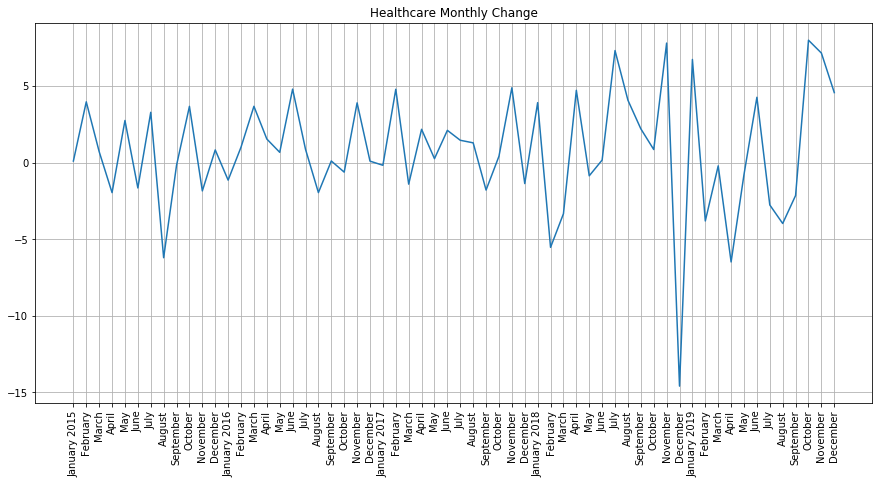

In [28]:
healthcare= stocks_b['Healthcare']
healthcare= pd.DataFrame(healthcare)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(healthcare))
plt.plot(ax, healthcare)
plt.title('Healthcare Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

h_count=healthcare.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(h_count)

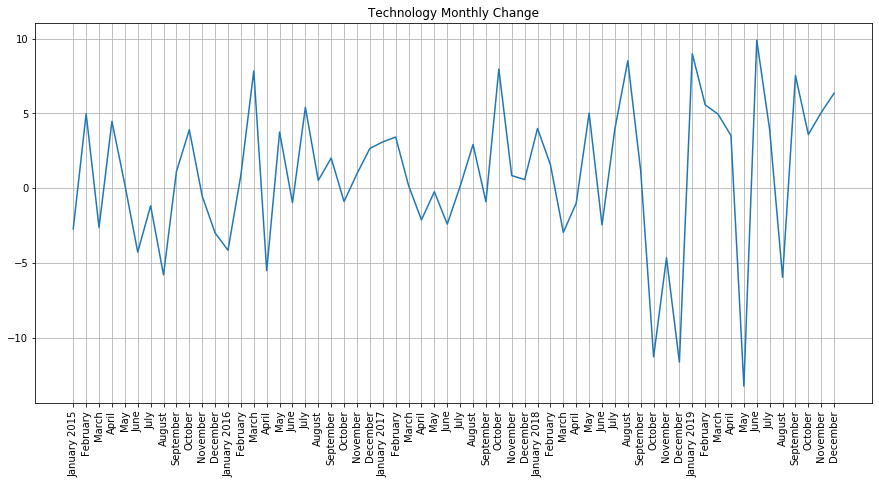

In [29]:
t_df= stocks_b['Technology']
technology=pd.DataFrame(t_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(technology))
plt.plot(ax, technology)
plt.title('Technology Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

t_count=technology.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(t_count)

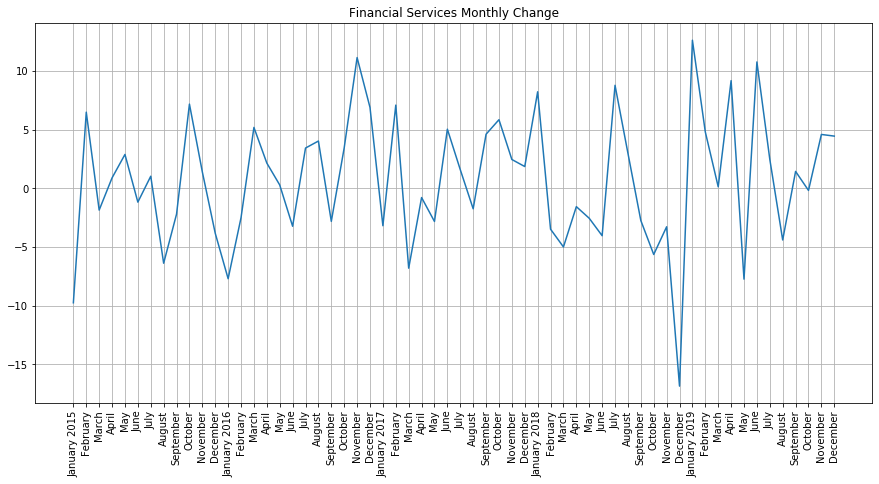

In [30]:
f_df= stocks_b['Financial Services']
financial_services=pd.DataFrame(f_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(financial_services))
plt.plot(ax, financial_services)
plt.title('Financial Services Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

f_count= financial_services.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(f_count)

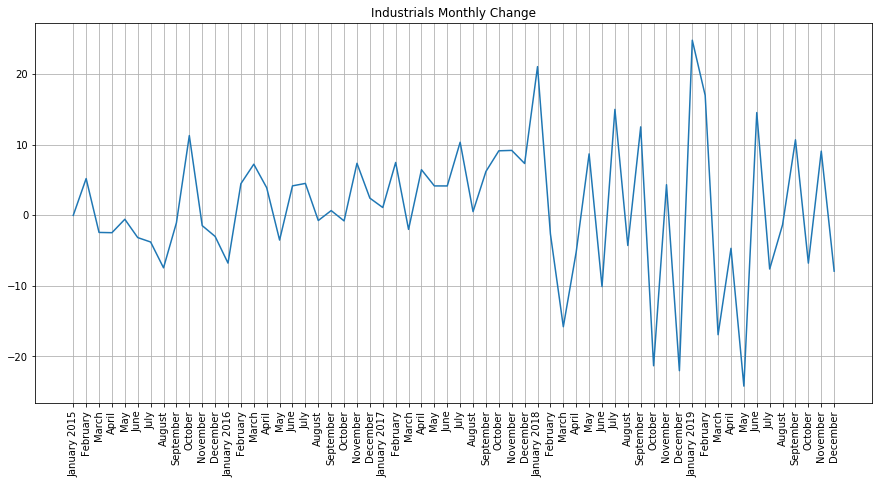

In [31]:
i_df= stocks_b['Industrials']
industrials=pd.DataFrame(i_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(industrials))
plt.plot(ax, industrials)
plt.title('Industrials Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

i_count= industrials.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(i_count)

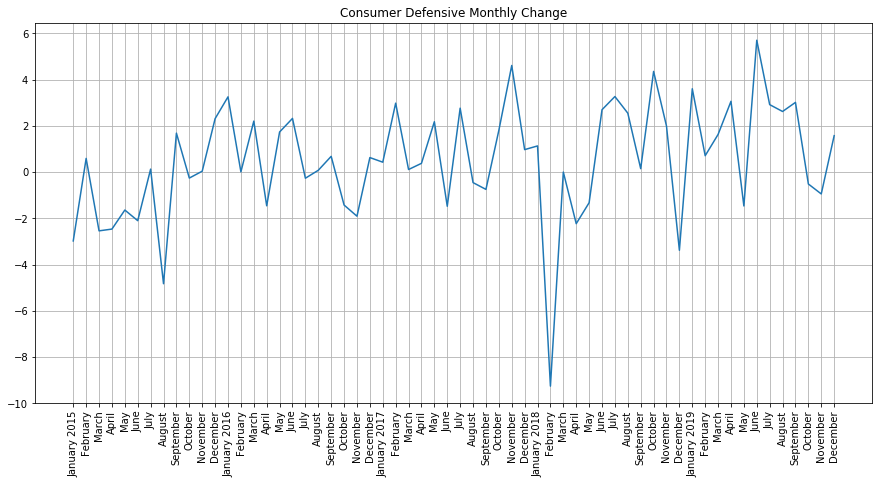

In [32]:
cd_df= stocks_b['Consumer Defensive']
consumer_defensive=pd.DataFrame(cd_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(consumer_defensive))
plt.plot(ax, consumer_defensive)
plt.title('Consumer Defensive Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

cd_count= consumer_defensive.corrwith(dow_graph["Monthly Change"])
correlation_counts.append(cd_count)

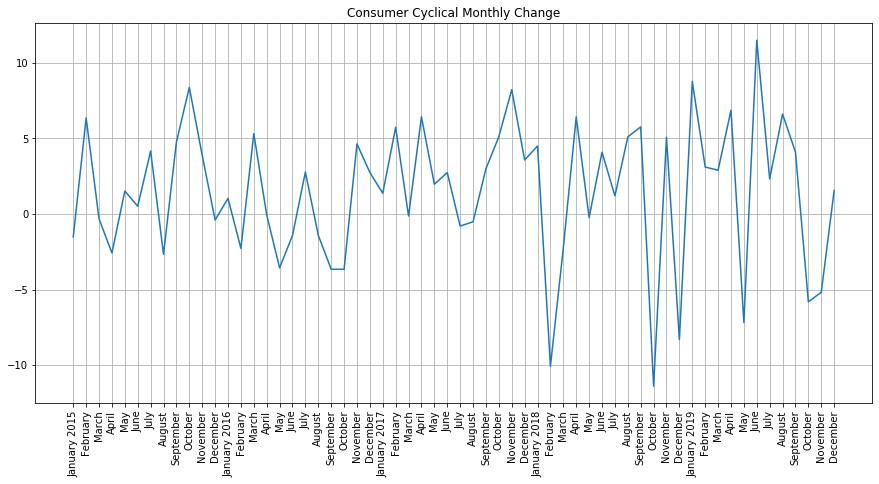

In [33]:
cc_df= stocks_b['Consumer Cyclical']
consumer_cyclical=pd.DataFrame(cc_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(consumer_cyclical))
plt.plot(ax, consumer_cyclical)
plt.title('Consumer Cyclical Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

cc_count=consumer_cyclical.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(cc_count)

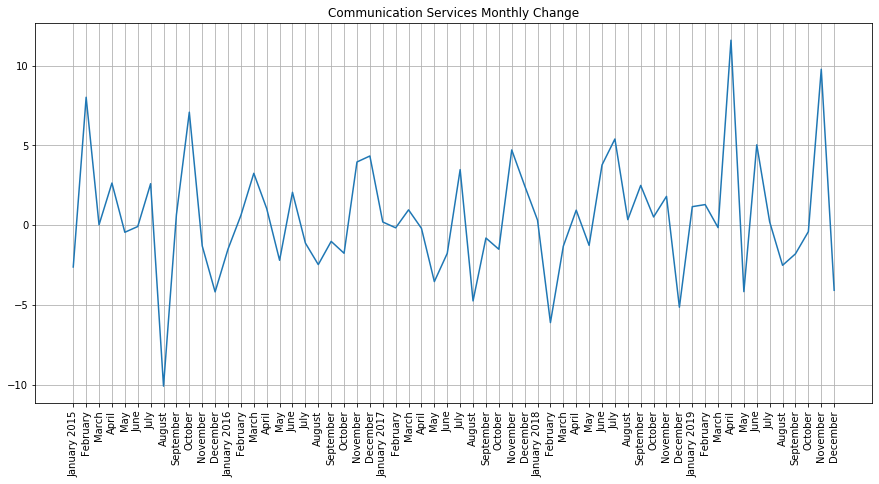

In [34]:
cs_df= stocks_b['Communication Services']
communication_services=pd.DataFrame(cs_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(communication_services))
plt.plot(ax, communication_services)
plt.title('Communication Services Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

cs_count=communication_services.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(cs_count)

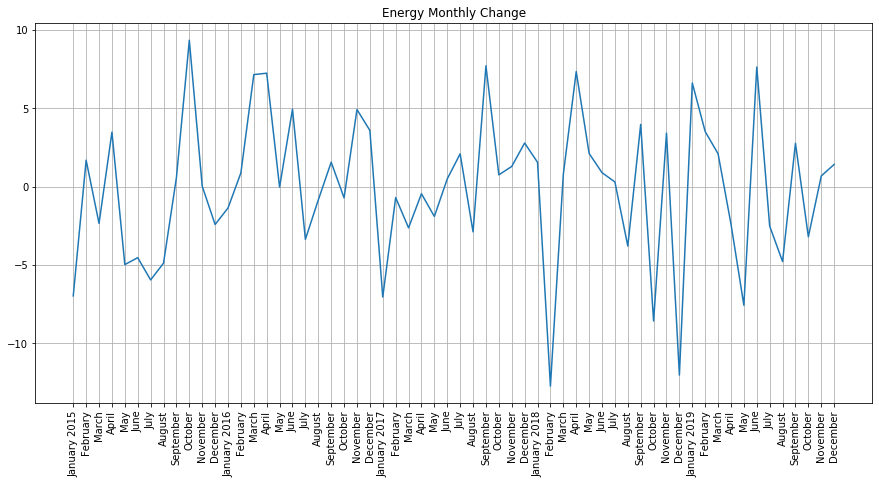

In [35]:
e_df= stocks_b['Energy']
energy=pd.DataFrame(e_df)

fig=plt.figure(figsize=(15,7))
ax= np.arange(len(energy))
plt.plot(ax, energy)
plt.title('Energy Monthly Change')
plt.xticks(ax,calender,rotation=90)
plt.grid()

e_count= energy.corrwith(dow_graph['Monthly Change'])
correlation_counts.append(e_count)

In [36]:
correlation_df=pd.DataFrame(correlation_counts)

In [37]:
correlation_df

,Healthcare,Technology,Financial Services,Industrials,Consumer Defensive,Consumer Cyclical,Communication Services,Energy
0,0.638121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.794922,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.874308,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.852058,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.435784,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.713978,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.593464,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710945


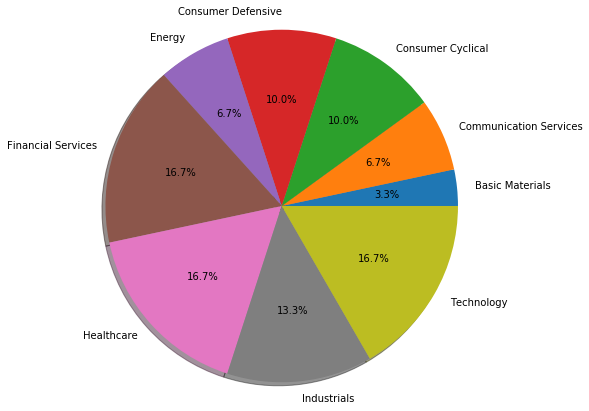

In [44]:
industry_df_sector= industry_df.groupby('Sector')
sector_each= industry_df_sector.count()
sector_each= sector_each.reset_index()
sector_each
plt.figure(figsize=(7,7))
plt.pie(sector_each['Symbol'],labels=sector_each["Sector"], autopct='%1.1f%%',
       shadow= True)
plt.axis('equal')
plt.show()